In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

%matplotlib inline

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(columns=['RowNumber'])
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [4]:
churn_data['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

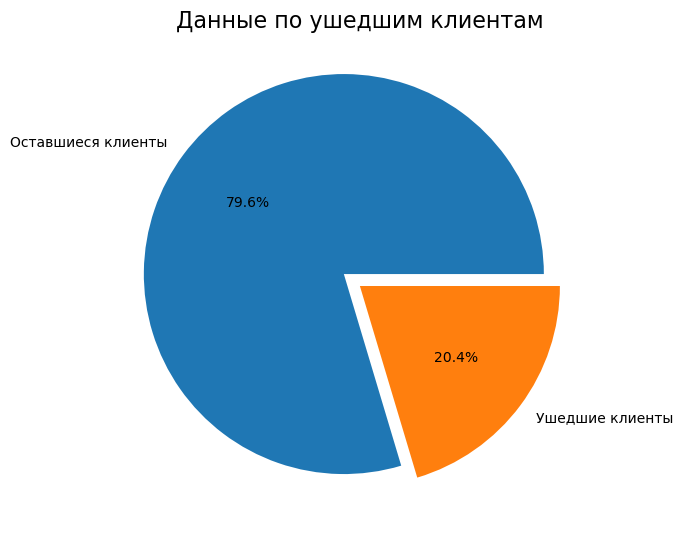

In [5]:
exited_numbers = churn_data['Exited'].value_counts(normalize=True)
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Данные по ушедшим клиентам', fontsize=16)
axes.pie(
    exited_numbers,
    labels=['Оставшиеся клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    explode = [0.1, 0]
);

Из круговой диаграммы можно сделать вывод, что из банка ушло только чуть больше 20% клиентов, 5-я часть от всех, представленных в таблице

In [6]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
#      Опишите распределение и сделайте выводы.

(119827.49379288674, 29542.324406758766, 210112.66317901472)

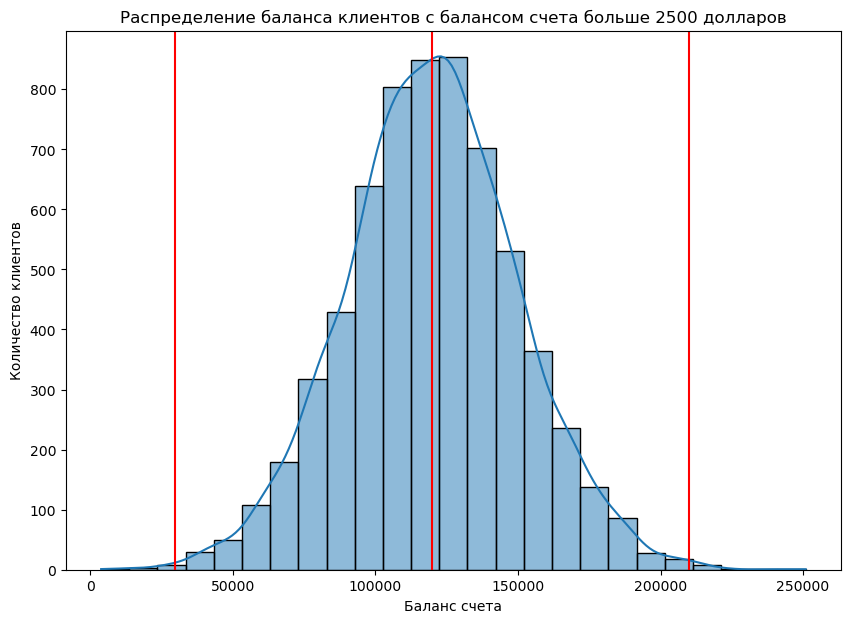

In [12]:
rich_customers = churn_data.loc[churn_data['Balance'] > 2500, 'Balance']
deviation_3std = (rich_customers.mean(),
                  rich_customers.mean()-3.0*rich_customers.std(),
                  rich_customers.mean()+3.0*rich_customers.std())
fig = plt.figure(figsize=(10, 7))
histplot = sns.histplot(
    data=rich_customers,
    bins=25,
    kde=True
)
histplot.set_title('Распределение баланса клиентов с балансом счета больше 2500 долларов');
histplot.set_xlabel('Баланс счета');
histplot.set_ylabel('Количество клиентов');

plt.axvline(deviation_3std[0], color='red')
plt.axvline(deviation_3std[1], color='red')
plt.axvline(deviation_3std[2], color='red');
deviation_3std

Визуально распределение клиентов очень похоже на нормальное, со средним значением баланса примерно равным 120000, соответствующим максимуму распределения (порядка 830 клиентов). Баланс счета почти всех клиентов лежит в диапазоне от 30000 до 210000 долларов, что соответствует +- 3 среднеквадратическим отклонениям. Бросающихся в глаза выбросов выбросов и аномалий на распределении нет

In [ ]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
#      Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
#      Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

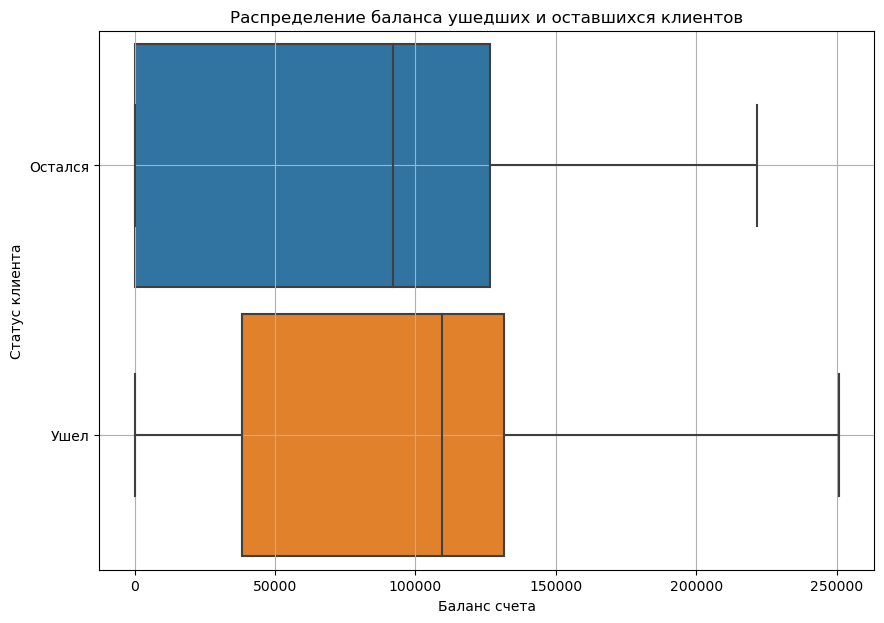

In [104]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса ушедших и оставшихся клиентов')
boxplot.set_xlabel('Баланс счета')
boxplot.set_ylabel('Статус клиента')
boxplot.set_yticklabels(['Остался','Ушел'])
boxplot.grid();

Медиана баланса счета ушедших клиентов больше, чем у оставшихся. Также у ушедших клиентов более стабильное распределение средств на счете (меньше ширина прямоугольника вокруг медианы). В то же время, у ушедших клиентов больше максимальное значение баланса.

На основании одного этого графика сложно делать выводы о том, что может не устраивать клиентов банка, но предположу, что поскольку в большинстве своем это состоявшиеся клиенты со значимой, в среднем, суммой на счету, их могла не устроить политика банка в области процентных ставок по вкладам или кредитам или в области тарифов за обслуживание. В то время, как для новых клиентов (клиенты с незначительной или нулевой суммой на счету), применяются льготные тарифы, что повышает их лояльность банку, но не приносит ему денег.

In [ ]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов?
#      На какую возрастную категорию клиентов стоит обратить внимание банку?

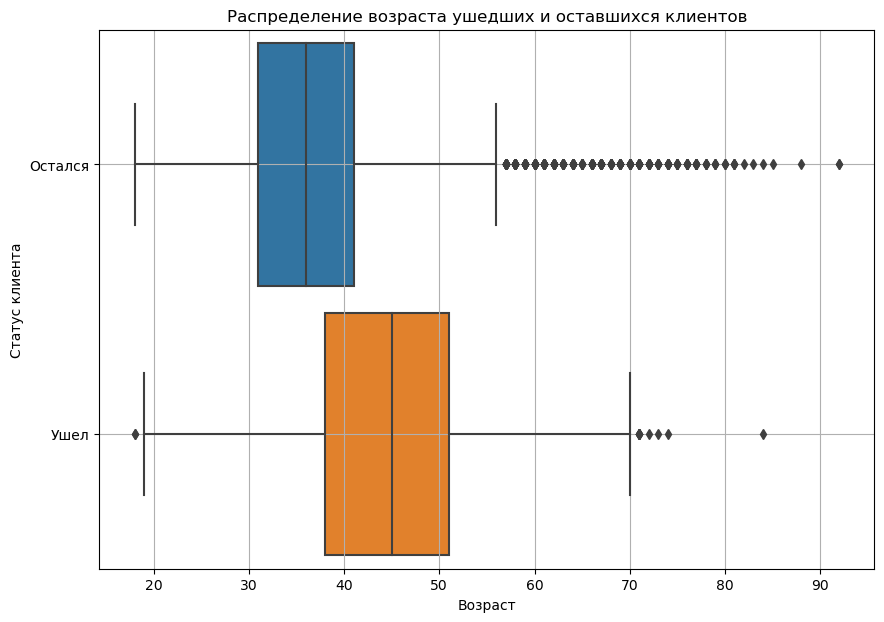

In [67]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста ушедших и оставшихся клиентов')
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Статус клиента')
boxplot.set_yticklabels(['Остался','Ушел'])
boxplot.grid();

Потенциальных выбросов больше среди оставшихся клиентов. При этом банку стоит обратить внимание на возрастную категорию от 40 до 50 лет т.к. большинство ушедших клиентов находятся именно в ней. Возможно это как-то связано с тем, что клиенты в этом возрасте начинают задумываться о пенсионных накоплениях и анализировать предложения различных банков в разрезе увеличения будущей пенсии. В таком случае банку стоит подумать над разработкой пенсионных накопительных программ или улучшением существующих

In [ ]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
#      Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками?
#      Если не видите явной взаимосвязи, укажите это.

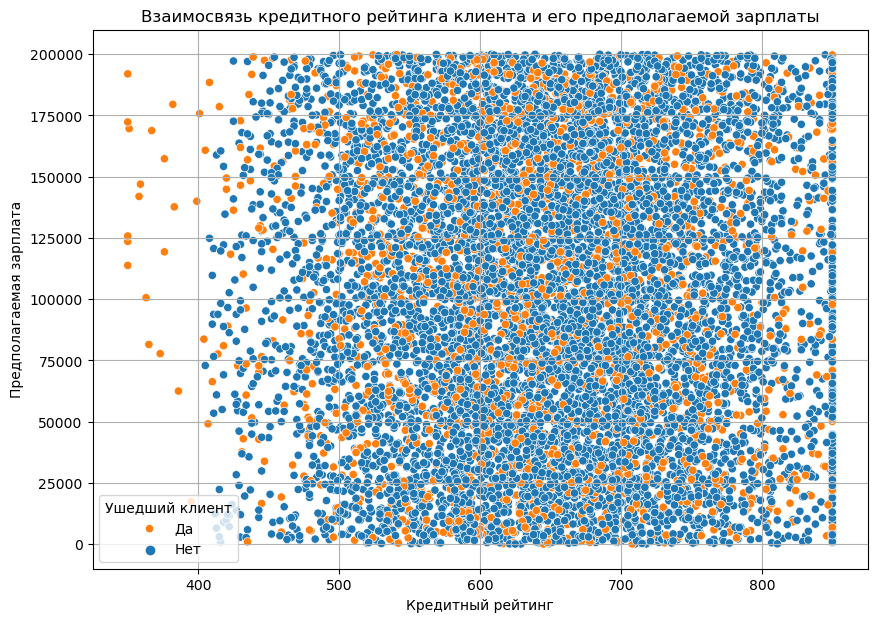

In [30]:
fig = plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(
    data=churn_data,
    x="CreditScore",
    y="EstimatedSalary",
    hue="Exited")
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая зарплата')
scatterplot.legend(title='Ушедший клиент',
                   loc='lower left',
                   labels=['Да', 'Нет'])
scatterplot.grid();

Явной взаимосвязи между этими признаками не видно

In [ ]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [107]:
exited_by_gender = churn_data.groupby(['Gender'])['Exited'].mean()*100
exited_by_gender = exited_by_gender.rename({'Male': 'Мужской', 'Female': 'Женский'})
exited_by_gender

Gender
Женский    25.071539
Мужской    16.455928
Name: Exited, dtype: float64

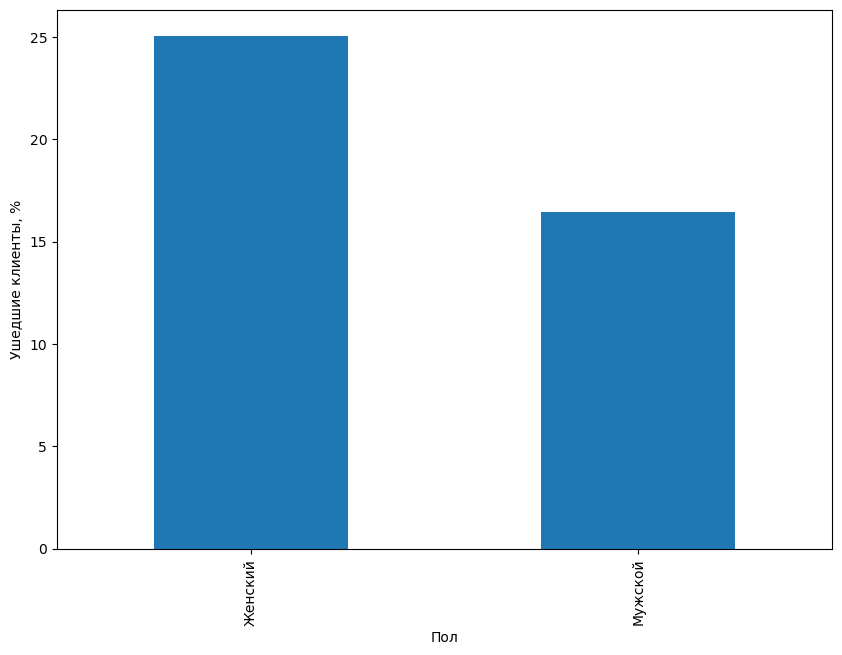

In [109]:
fig = plt.figure(figsize=(10, 7))
exited_by_gender.plot.bar(ylabel='Ушедшие клиенты, %', xlabel='Пол');

Из столбчатой диаграммы можно сделать вывод, что женщины уходят из банка примерно в 1.5 раза чаще, чем мужчины

In [ ]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг?
#      Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Здесь я не очень понял, зачем нужна многоуровневая стобчатая диаграмма. Чтобы посмотреть, как отток клиентов зависит от числа услуг, достаточно обычной диаграммы. На всякий случай я построил еще 2 многоуровневые столбчатые диаграммы для доли ушедших клиентов в зависимости от числа услуг: для разных стран и для клиентов разного пола и сделал по ним выводы. Кроме того, сделал многоуровневую диаграмму напрямую, как сказано в задании (отток клиентов от числа услуг), но она абсолютно неиформативная и смотрится хуже обычной диаграммы

In [35]:
exited_by_NumOfProducts = churn_data.groupby(['NumOfProducts'])['Exited'].mean()*100
exited_by_NumOfProducts

NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64

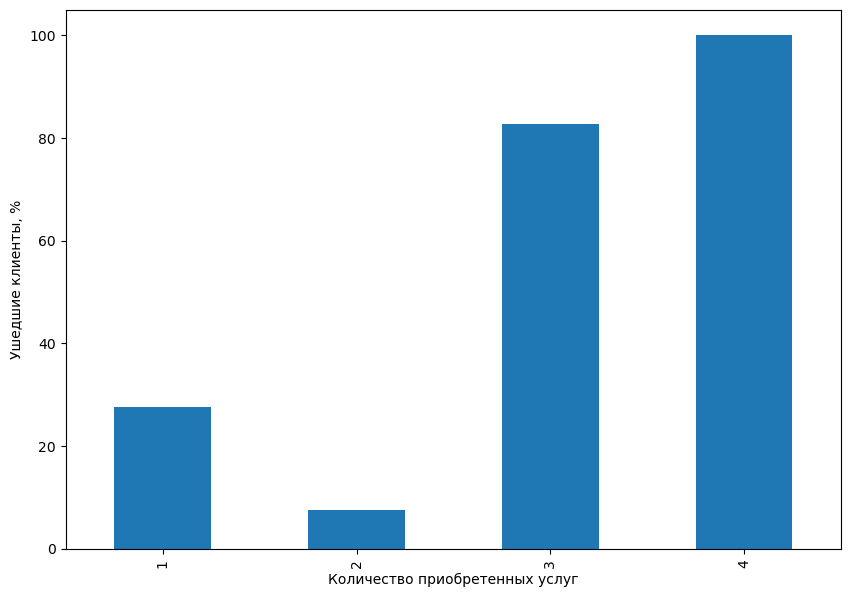

In [110]:
fig = plt.figure(figsize=(10, 7))
exited_by_NumOfProducts.plot.bar(ylabel='Ушедшие клиенты, %', xlabel='Количество приобретенных услуг');

Можно сделать вывод, что наибольший процент ушедших среди клиентов с количеством приобретенных услуг 3 или 4, при этом ушли все клиенты, которые купили у банка 4 услуги. Это может означать недовольство клиентов качеством предоставляемых услуг. Однако, вероятно, это относится только к определенным услугам, поскольку среди клиентов, купивших 2 услуги отток минимальный.

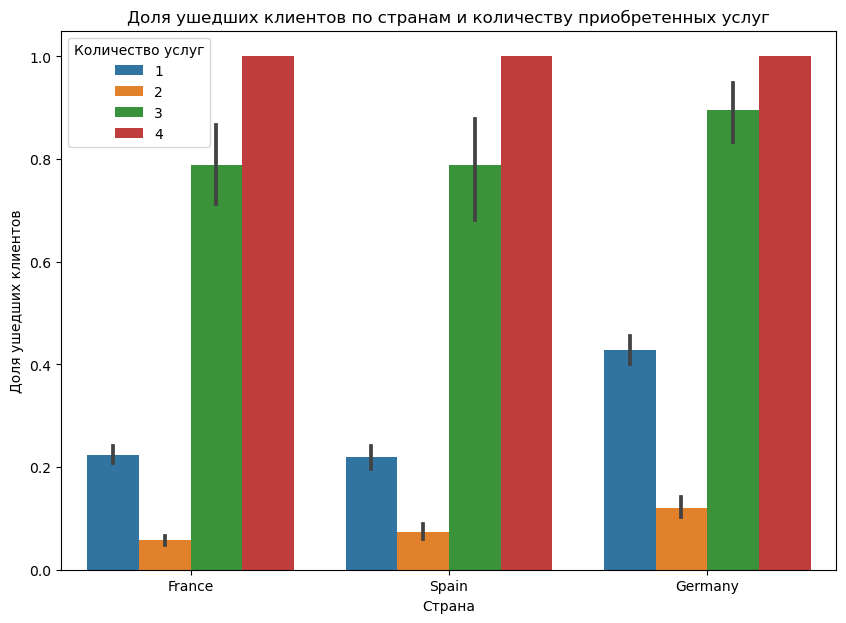

In [92]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x="Geography",
    y="Exited",
    hue="NumOfProducts"
)
barplot.set_xlabel('Страна')
barplot.set_ylabel('Доля ушедших клиентов')
barplot.legend(title='Количество услуг')
barplot.set_title('Доля ушедших клиентов по странам и количеству приобретенных услуг');

Из данной многоуровневой столбчатой диаграммы можно сделать вывод, что наибольший отток клиентов в Германии, независимо от количества приобретенных услуг. За исключением клиентов, имеющих 4 услуги, в этом случае ушли все клиенты во всех странах. Отток во Франции и в Испании примерно одинаковый.

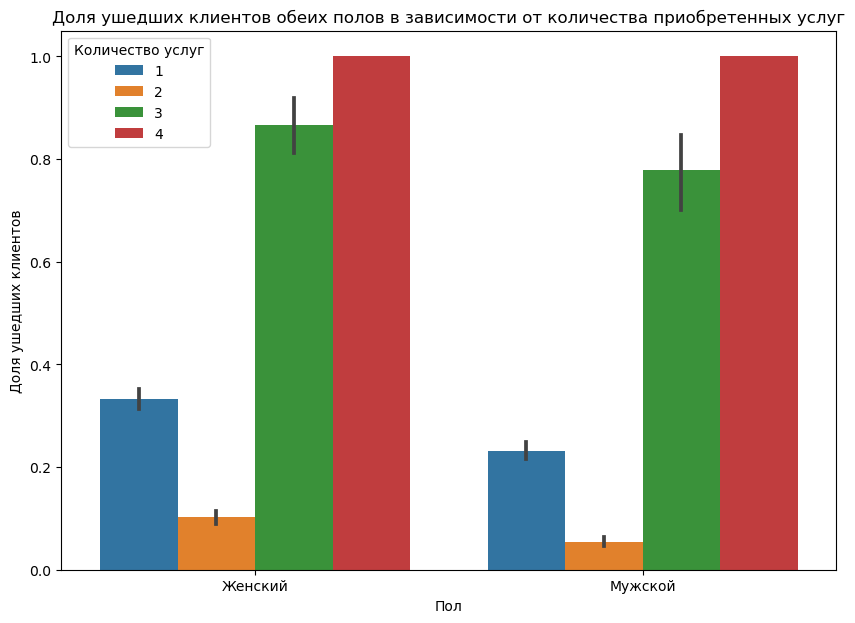

In [96]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=churn_data,
    x="Gender",
    y="Exited",
    hue="NumOfProducts"
)
barplot.set_xlabel('Пол')
barplot.set_xticklabels(['Женский', 'Мужской'])
barplot.set_ylabel('Доля ушедших клиентов')
barplot.legend(title='Количество услуг')
barplot.set_title('Доля ушедших клиентов обеих полов в зависимости от количества приобретенных услуг');

Можно отметить, что независимо от количества приобретенных услуг, доля ушедших женщин больше, за исключением клиентов, имеющих 4 услуги. В этом случае ушли все клиенты.

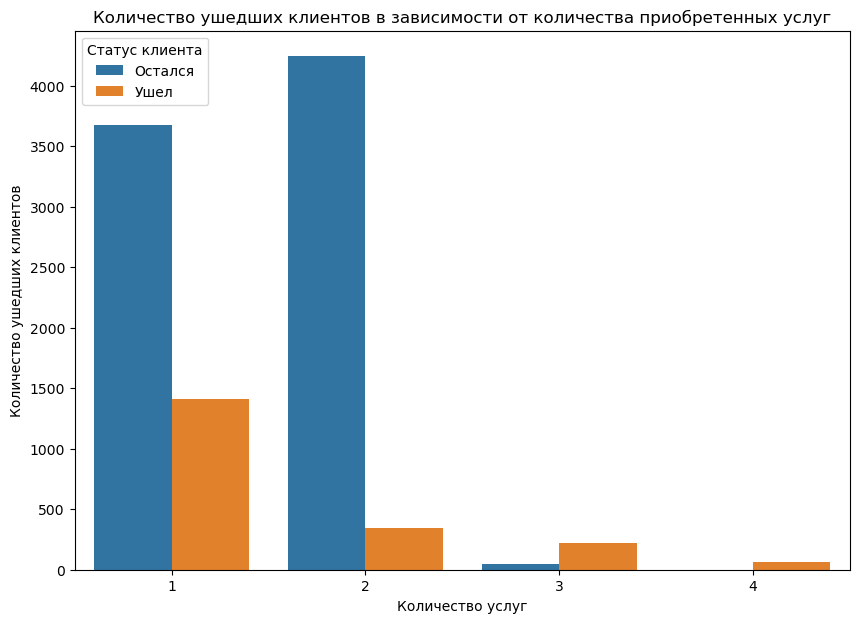

In [103]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.countplot(
    data=churn_data,
    x="NumOfProducts",
    hue="Exited"
)
barplot.set_xlabel('Количество услуг')
barplot.set_ylabel('Количество ушедших клиентов')
barplot.legend(title='Статус клиента',
               labels=['Остался', 'Ушел'])
barplot.set_title('Количество ушедших клиентов в зависимости от количества приобретенных услуг');

Диаграмма по информации и выводам аналогична обычной диаграмме, которую я привел в начале

In [ ]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это.
#      Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [33]:
exited_by_status = churn_data.groupby(['IsActiveMember'])['Exited'].mean()*100
exited_by_status = exited_by_status.rename({0: 'Не активный', 1: 'Активный'})
exited_by_status

IsActiveMember
Не активный    26.850897
Активный       14.269074
Name: Exited, dtype: float64

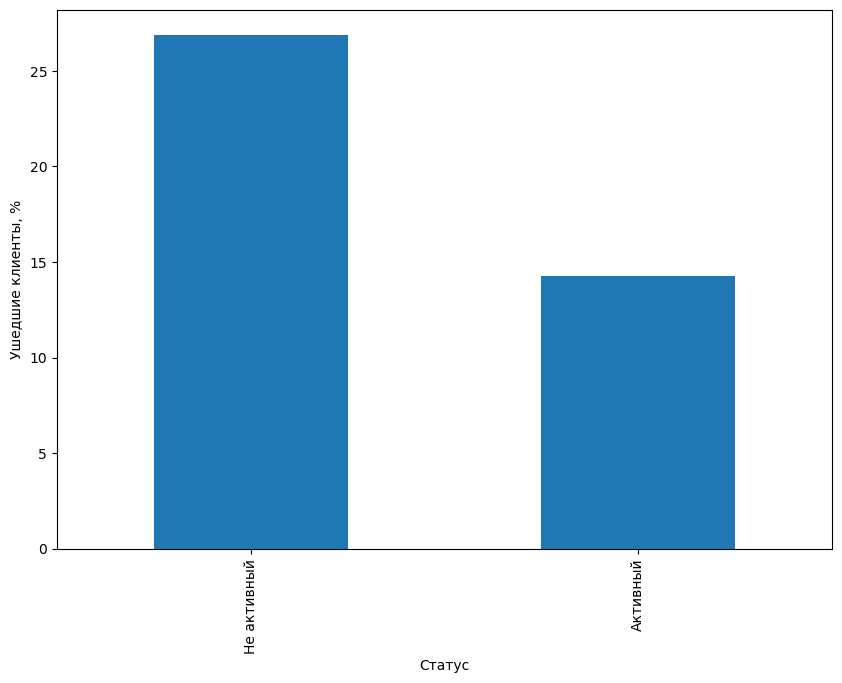

In [111]:
fig = plt.figure(figsize=(10, 7))
exited_by_status.plot.bar(ylabel='Ушедшие клиенты, %', xlabel='Статус');

Клиенты с активным статусом уходят из банка почти в 2 раза реже. Я бы изучил привелегии, которые дает статус активного клиента, и провел опрос активных клиентов чтобы понять, что для них наиболее важно и дает бОльшую лояльность банку. Дальше я бы провел опрос неактивных клиентов и спросил, почему они не хотят приобрести статус активного и какие из привелегий активного клиента могли бы изменить из решение. Я бы постарался провести опрос ушедших клиентов чтобы понять, какие шаги могли бы повлиять на их решение уйти из банка.

В итоге я бы предложил ввести промежуточную программу активности, в которую включил бы ряд ключевых привелегий (но не все). Таким образом система привелегий становится двухуровневой (например Silver и Gold), при этом Gold - это аналог текущего активного статуса и действующие активные клиенты получают его автоматом. А неактивным клиентам я бы предложил приобрести статус Silver по более выгодной цене, чем Gold, но при этом с меньшим набором привелегий

In [ ]:
# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму,
#      которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [63]:
exited_by_geography = churn_data.groupby(['Geography'])['Exited'].mean()*100
exited_by_geography = exited_by_geography.to_frame(name = 'Exited_share').reset_index()
exited_by_geography

,Geography,Exited_share
0,France,16.154767
1,Germany,32.443204
2,Spain,16.673395


In [113]:
fig = px.choropleth(
    data_frame=exited_by_geography,
    locations='Geography',
    locationmode = "country names",
    color="Exited_share",
    scope="europe",    
    title='Доля ушедших клиентов',
    color_continuous_scale='Reds'
)
fig.show()

Доля ушедших клиентов в Германии в 2 раза больше чем во Франции и в Испании. Это может быть связано с национальными особенностями, возможно понижение процентной ставки ЦБ Германии и, как следствие, снижение процентных ставок по вкладам, в связи с чем клиенты были вынуждены выводить деньги в другие страны. Также, возможно, ошибками директората отделений банка в Германии или с закрытием или реорганизацией офисов в Германии, в связи с чем клиентам стало неудобно пользоваться услугами этого банка.

In [ ]:
# 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(),
#       которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак
#       CreditScoreCat — категории кредитного рейтинга.
#       Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat),
#       а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure).
#       В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
#       На основе полученной сводной таблицы постройте тепловую карту с аннотацией.
#       Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [45]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [68]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat']

0            Fair
1            Fair
2            Poor
3            Good
4       Excellent
          ...    
9995         Good
9996         Poor
9997         Good
9998         Good
9999    Excellent
Name: CreditScoreCat, Length: 10000, dtype: object

In [47]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc=np.mean
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


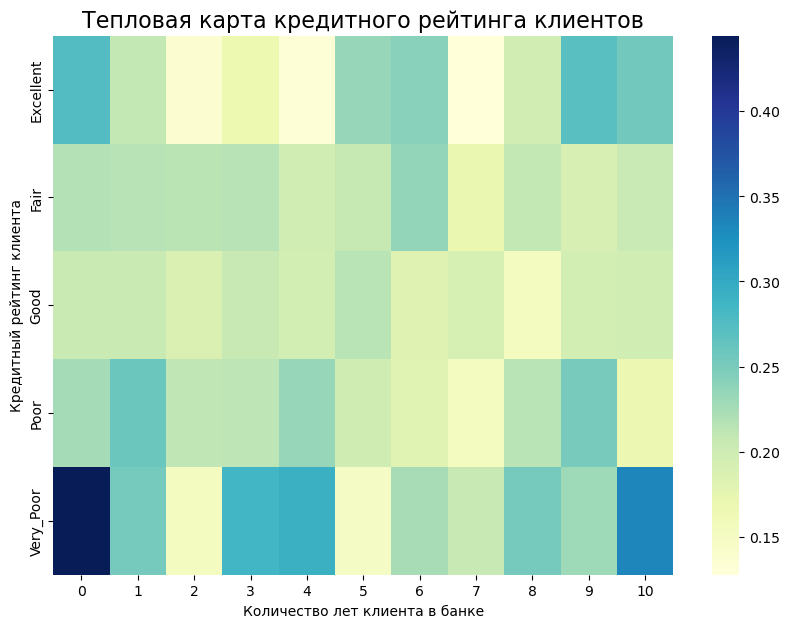

In [116]:
fig = plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта кредитного рейтинга клиентов', fontsize=16);
heatmap.set_xlabel('Количество лет клиента в банке')
heatmap.set_ylabel('Кредитный рейтинг клиента');

Чаще всего уходят клиенты из категории с самым низким кредитным рейтингом "Very Poor", причем наибольшая доля ушедших среди клиентов первого года (0 лет пользования услугами банка). Но и для большинства других значений срока пользования услугами банкадоля ушедших клиентов максимальна в категориях "Poor" и "Very Poor". Возможно это как-то обусловлено жесткой поликой банка по отношению к клиентам с низким кредитным рейтингом, сложностями с выдачей им кредитов